# Gold Price Prediction using Machine Learning

Importing the dependencies

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Pre Processing 

In [43]:
gold_data = pd.read_csv('gold_price_data.csv')

In [44]:
# printing first 5 rows of data
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [45]:
# checking shape of the data
gold_data.shape

(2290, 6)

In [46]:
# More Basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [47]:
# Checking for null values 
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [48]:
# getting statical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<AxesSubplot:>

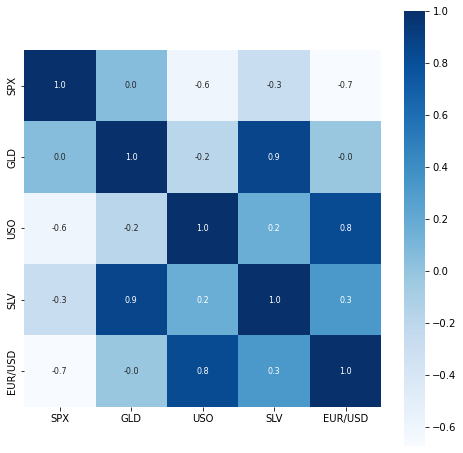

In [49]:
# Creating correaltion among data points
correlation = gold_data.corr()

# constructing a heat map to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap=('Blues'))

In [50]:
# Checking for correlation values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


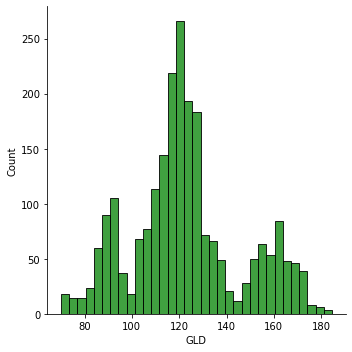

In [51]:
# Checking the distribution of GLD
sns.displot(gold_data['GLD'], color='green')

Spliting the Features and Targets

In [52]:
X = gold_data.drop(['Date','GLD'], axis =1)
Y = gold_data['GLD']

In [53]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [54]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the data into Trainning and Testing Data

In [58]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training = Random Forest Regressor 

In [59]:
regressor = RandomForestRegressor(n_estimators=100)

In [60]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [61]:
# Prediction on test data 

test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.07049913  82.01889997 115.88739961 127.73840061 120.66550124
 154.76599821 150.27249875 126.04270032 117.47089868 126.07810059
 116.62490118 172.65150067 141.33889763 167.77139842 115.40499989
 117.45310057 138.52190325 169.84430101 159.28990335 161.50599908
 155.15599969 125.2520003  176.54089975 157.26180222 125.15930051
  93.97110005  77.39450018 120.61189988 119.1330995  167.48099993
  88.31340059 125.31540041  91.0836008  117.63300036 121.10059903
 136.36600074 115.57680133 115.58750063 146.7620998  106.98520083
 104.53880223  87.17349778 126.53460061 117.90750004 153.21059904
 119.76560012 108.33910011 108.08179792  93.16900074 127.05379781
  74.69510055 113.66149923 121.09249986 111.21319911 118.89109911
 120.2294994  158.40870002 167.3813014  147.005997    85.79989857
  94.44570054  86.8769989   90.7300998  119.05230092 126.45640061
 127.50250028 169.65199976 122.25989935 117.25569916  98.51610045
 168.03390099 143.33129811 132.64690225 121.22080213 121.34499922
 120.09000

In [63]:
# R Square Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R Square Error:', error_score)

R Square Error: 0.9896895122916126


In [64]:
# Compare Actual Values with real values

Y_test = list(Y_test)

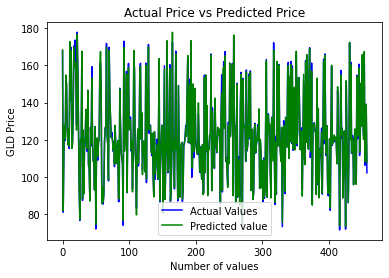

In [65]:
plt.plot(Y_test, color= 'blue', label='Actual Values')
plt.plot(test_data_prediction, color='green', label= 'Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()